<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>Derivation</center></span>
</div>

Let's go back a litle and do something similar to the interpolation,  
Exept that now we would like to compute the derivative of the runge function :
$$\text{runge}(x) = \frac{1}{1+25x^2}$$

And again, I would like to do that knowing only a few values of the runge function.  
Define this function `runge(x)`

In [1]:
def runge(x):
    return 1 / (1 + 25 * x ** 2)

I will not ask you to compute analytically it's derivative (but you should be ablo to do it)  
the solution is  
$$\text{runge}'(x) = -\frac{50 x}{(1 + 25 x^2)^2}$$

Define this function `drunge(x)`

In [2]:
def drunge(x):
    return - (50 * x) * runge(x) ** 2

Plot those two functions for $x\in\left[-1,1\right]$

<IPython.core.display.Javascript object>


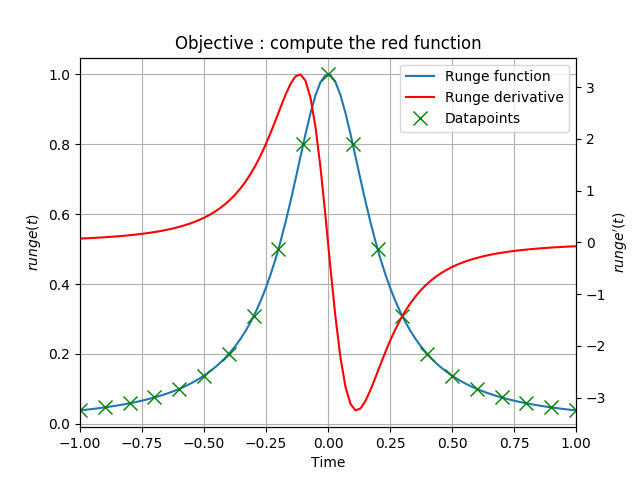

In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

xmin, xmax = -1.0, 1.0

t = np.linspace(xmin, xmax, 100)
datapoints = np.linspace(xmin, xmax, 21)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

f_plt = ax1.plot(t, runge(t), label="Runge function")
f_pts = ax1.plot(datapoints, runge(datapoints), 'gx', label="Datapoints",markersize=10)
df_plt = ax2.plot(t, drunge(t),'r', label="Runge derivative")

ax1.set_xlim(xmin,xmax)
ax1.set_xlabel("Time")
ax1.set_ylabel("$runge(t)$")
ax2.set_ylabel("$runge'(t)$")
plt.title('Objective : compute the red function') 
ax1.grid()

lns = f_plt + df_plt + f_pts
labs = [l.get_label() for l in lns]
plt.legend(lns, labs)

plt.show()


# First order finite difference
What's the definition of a derivative ?

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

Okay, but python doesn't know how to compute a limit...  
Lets take $h$ the distance between a point and the next and apply this formula.

Define a function `forward_finite_runge(x)` that given $n$ points in `x` return the derivative on the $n-1$ first points

In [4]:
def forward_finite_drunge(x):
    return (runge(x[1:]) - runge(x[:-1])) / (x[1:] - x[:-1])

We could have taken h as the distance between a point and the previous one.

Define a function `backward_finite_drunge(x)` that given $n$ points in `x` return the derivative on the $n-1$ last points

In [5]:
def backward_finite_drunge(x):
    return (runge(x[1:]) - runge(x[:-1])) / (x[1:] - x[:-1])

In order to make a beautifull graph, let's use the spline method to interpolate the result

In [6]:
from scipy.interpolate import make_interp_spline

forward = make_interp_spline(datapoints[:-1],
                             forward_finite_drunge(datapoints),
                             k=3)

backward = make_interp_spline(datapoints[1:],
                              backward_finite_drunge(datapoints),
                              k=3)

If you correctly wrote your function, the cell bellow should work.  
Try with different value for `h`, positive and negative

<IPython.core.display.Javascript object>


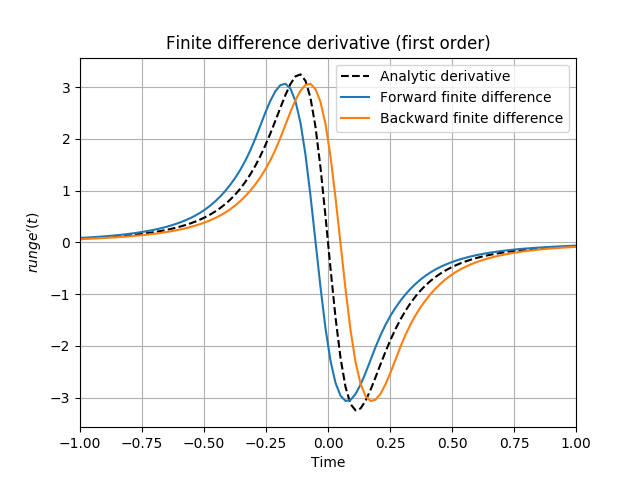

In [7]:
fig, ax = plt.subplots()

ax.plot(t, drunge(t),'k--', label="Analytic derivative")
ax.plot(t, forward(t),'-', label="Forward finite difference")
ax.plot(t, backward(t),'-', label="Backward finite difference")

ax.set_xlim(xmin,xmax)
plt.xlabel("Time")
plt.ylabel("$runge'(t)$")
plt.title('Finite difference derivative (first order)') 
ax.grid()
plt.legend()
plt.show()

# Second order finite difference

We could have taken a different formula.  
This one is similar but is also symetrical:
$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{2h}$$

Let's use it, but in order to keep the same number of points, you will use first order formulas for each end points

Define a function `second_finite_runge(x)` that given some points in `x` return the derivative on the same points

In [8]:
def second_finite_runge(x):
    res = np.zeros_like(x)
    
    res[1:-1] = (runge(x[2:]) - runge(x[:-2])) / (x[2:] - x[:-2])
    res[0] = (runge(x[1]) - runge(x[0])) / (x[1] - x[0])
    res[-1] = (runge(x[-1]) - runge(x[-2])) / (x[-1] - x[-2])
    
    
    return res

If you correctly wrote your function, the cell bellow should work.  
Try with different value for `h`, positive and negative

<IPython.core.display.Javascript object>


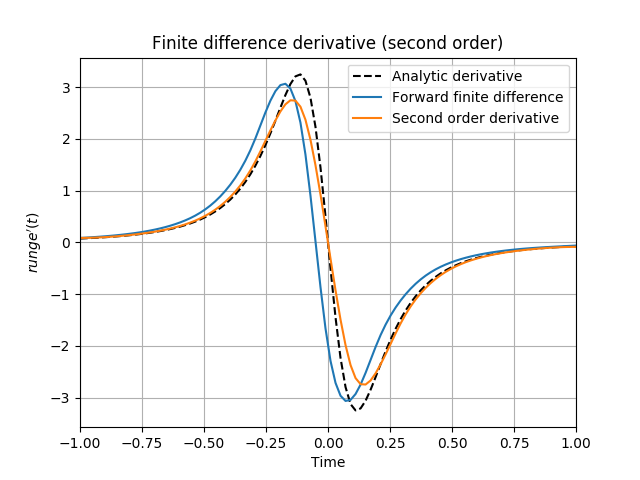

In [9]:
fig, ax = plt.subplots()


second = make_interp_spline(datapoints,
                            second_finite_runge(datapoints),
                            k=3)

ax.plot(t, drunge(t),'k--', label="Analytic derivative")
ax.plot(t, forward(t),'-', label="Forward finite difference")
ax.plot(t, second(t),'-', label="Second order derivative")
ax.set_xlim(xmin,xmax)
plt.xlabel("Time")
plt.ylabel("$runge'(t)$")
plt.title('Finite difference derivative (second order)') 
ax.grid()
plt.legend()
plt.show()

# High order finite difference 

I know an another thing that mix function and its derivatives : the Taylor expension:
$$ f(x+h) = f(x) + hf^{(1)}(x) + ... + \frac{h^n}{n!}f^{(n)}(x) + ...$$

Can I use it to compute a derivative with better precision ?
$$
\begin{array}{rcccccccccl}
f(x+h) &=& f(x) &+& hf^{(1)}(x) &+& \frac{h^2}{2}f^{(2)}(x) &+& \frac{h^3}{6}f^{(3)}(x) &+& ...\\
-(~~f(x-h) &=& f(x) &-& hf^{(1)}(x) &+& \frac{h^2}{2}f^{(2)}(x) &-& \frac{h^3}{6}f^{(3)}(x) &+& ...~~)\\
\hline
       &=& 0    &+& 2hf^{(1)}(x) &+& 0 &+& \frac{h^3}{3}f^{(3)}(x) &+& ...
\end{array}$$

Hey, but if I ignore all the terms $h^n$ for $n>2$, I obtain the previous formula.  
What if, using more points (here only two are used : $x+h$ and  $x-h$),  
I could nullify more terms thus ignoring less of them ?

So I'm looking for a linear combination of some points that will nullify a maximum number of terms.  
This is a lot like looking for the coefficients of a polynomial that will go through some points.  
In this case we have :
- $H = \begin{bmatrix} h_0 & h_1 & h_2 & ...& h_n\end{bmatrix}$  
- $Y = \begin{bmatrix} 0 & 1 & 0 & ...&0\end{bmatrix}$
- $M = \begin{bmatrix}
1 & 1 & 1 & ... & 1\\
h_0 & h_1 & h_2 & ... & h_n\\
\frac{h_0^2}{2} & \frac{h_1^2}{2} & \frac{h_2^2}{2} & ... & \frac{h_n^2}{2}\\
\vdots & \vdots & \vdots& \ddots & \vdots\\
\frac{h_0^n}{n!} & \frac{h_1^n}{n!} & \frac{h_2^n}{n!} & ... & \frac{h_n^n}{n!}\\
\end{bmatrix}$

And we are looking to the solution of $MC=Y$, where $C$ contains the coefficients of the linear combination.

We will have to do it for **every** points

First we need to define a `factorial(n)` function.  
Let's do it the reccursive way:
- if $n <= 1$ the result is known : $\text{factorial}(n) = 1$
- otherwise we have : $\text{factorial}(n) = n \cdot \text{factorial}(n-1)$

In [10]:
def factorial(n):
    if n<=1:
        return 1
    return n*factorial(n-1)

Define a function `finite_coef(H, size)` that, given an array of space steps, compute the coefficents as described above

In [11]:
def finite_coef(H):

    n = len(H)
    
    Y = np.zeros(n)
    Y[1] = 1
    
    M = np.zeros((n, n))
    for col in range(n):
        for line in range(n):
            M[line, col] = H[col] ** line / factorial(line)
        col += 1
    
    return np.linalg.solve(M, Y)


Define a function `stencil(i,X,size)` that return two index `inf` and `sup` such that:
- $0<= \text{inf} < \text{sup} < \text{len(X)}$
- $ \text{sup} - \text{inf} = \text{size}$
- $ \dfrac{\text{sup}+\text{inf}}{2}$ is as close as possible to `i`

This will allow us to pick `size` points around `i` as symetrical as possible

In [12]:
def stencil(i, X, size):
    inf = max(0, i - size//2)
    sup = min(len(X), inf + size)
    inf = max(0, sup - size)
    return inf, sup

At last we can write a function `finite_runge(x, size)` that given some points in `x` return the derivative on the same points computed with `size` points.  
For each point in x, you'll have to
1. determine which `size` points to take into account
2. extract those points using `X[deb:fin]` (which gives you the array `[X[deb], X[deb+1],...,X[fin-1]]`)
3. compute the vector `H`
4. compute coefficients of the linear combination
5. compute the linear combination


In [13]:
def finite_runge(X, size):
    
    n = len(X)
    res = np.zeros(n)
    for i in range(n):

        inf, sup = stencil(i, X, size)

        local_x = X[inf:sup]
        
        H = local_x - X[i]
        
        coefs = finite_coef(H)

        res[i] = np.sum(coefs * runge(local_x))
    
    return res

If you correctly wrote your function, the cell bellow should work.  
Try different values for the stencil size

<IPython.core.display.Javascript object>


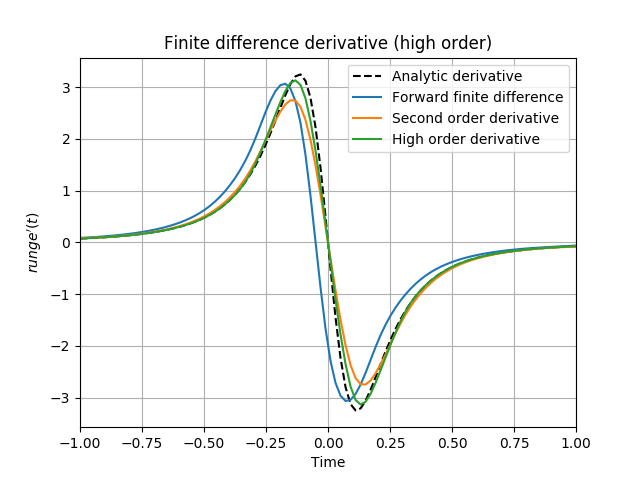

In [14]:
stencil_size = 5

fig, ax = plt.subplots()

finite = make_interp_spline(datapoints,
                            finite_runge(datapoints,stencil_size),
                            k=3)

ax.plot(t, drunge(t),'k--', label="Analytic derivative")
ax.plot(t, forward(t),'-', label="Forward finite difference")
ax.plot(t, second(t),'-', label="Second order derivative")
ax.plot(t, finite(t),'-', label="High order derivative")
ax.set_xlim(xmin,xmax)
plt.xlabel("Time")
plt.ylabel("$runge'(t)$")
plt.title('Finite difference derivative (high order)') 
ax.grid()
plt.legend()
plt.show()

# Finite elements

WARNING : we will not see real finite element but something very similar.  
The objective is to give you a general idea of it

Up until here, we only considered the values of the function.  
But the interpolation TP showed us that we could obtain some kind of approximation of the function that could be easyer to derive.

Use `scipy.interpolate.splrep` to compute a spline interpolation of `runge`

In [15]:
from scipy.interpolate import splrep
spline = splrep(datapoints, runge(datapoints))

Use `scipy.interpolate.PPoly` to transform the spline object in something more usable  
(In particular the function `from_spline`)

In [16]:
from scipy.interpolate import PPoly
ppoly = PPoly.from_spline(spline)

Write a function `ppoly_eval(xp, ppoly)` that will evaluate your piecewise polynomal on the point `xp`.  
For that you can use:
- `ppoly.x` is a vector of all breackpoints
- `ppoly.c` is a matrix such that :
$$\begin{align}
\text{spline}(x_p) &= \sum_{m=0}^\text{k} c_{m,i} (x_p - x_i)^{k-m-1} &\text{for}&& x_p \in \left[ x_i, x_{i+1}\right]
\end{align}$$

In [17]:
def ppoly_eval(xp, ppoly):
    k = ppoly.c.shape[0]
    for i in range(ppoly.x.shape[0]-1):
        if ppoly.x[i] <= xp <= ppoly.x[i+1]:
            return sum(ppoly.c[m, i] * (xp - ppoly.x[i])**(k-m-1) for m in range(k))

If you correctly wrote your functions, the next cell allows you to check that everything is ok so far.

<IPython.core.display.Javascript object>


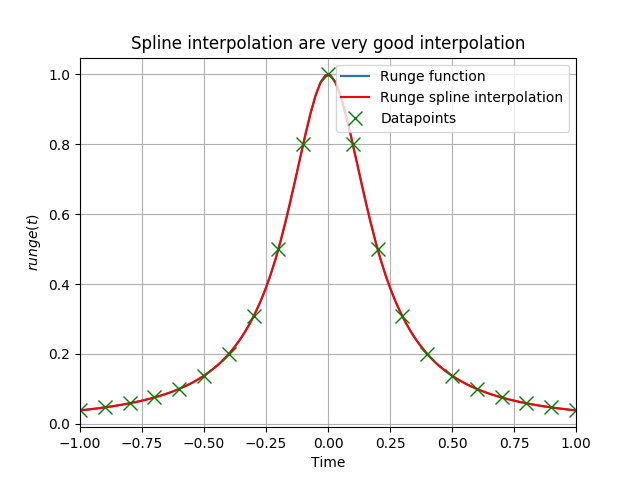

In [18]:

vppoly_eval = np.vectorize(ppoly_eval)

fig, ax = plt.subplots()

ax.plot(t, runge(t), label="Runge function")
ax.plot(t, vppoly_eval(t,ppoly),'r', label="Runge spline interpolation")
ax.plot(datapoints, runge(datapoints), 'gx', label="Datapoints",markersize=10)

ax.set_xlim(xmin,xmax)
ax.set_xlabel("Time")
ax.set_ylabel("$runge(t)$")
plt.title('Spline interpolation are very good interpolation') 
ax.grid()

plt.legend()

plt.show()

If you correctly wrote your function, the cell bellow should work

In [21]:
def dppoly_eval(xp, ppoly):
    k = ppoly.c.shape[0]
    for i in range(ppoly.x.shape[0]-1):
        if ppoly.x[i] < xp <= ppoly.x[i+1]:
            return sum((k-m-1)*ppoly.c[m, i] * (xp - ppoly.x[i])**(k-m-2) for m in range(k))

If you correctly wrote your function, the next cell allows you to see the derivative of `runge`

<IPython.core.display.Javascript object>


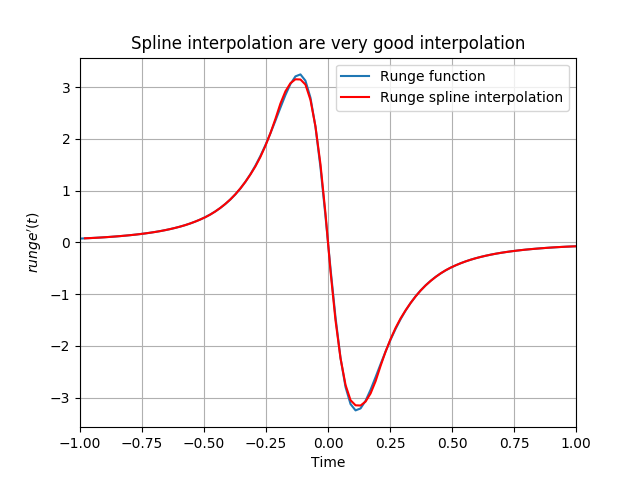

In [22]:

vdppoly_eval = np.vectorize(dppoly_eval)

fig, ax = plt.subplots()

ax.plot(t, drunge(t), label="Runge function")
ax.plot(t, vdppoly_eval(t,ppoly),'r', label="Finite element derivation")

ax.set_xlim(xmin,xmax)
ax.set_xlabel("Time")
ax.set_ylabel("$runge'(t)$")
plt.title('Spline interpolation are very good interpolation') 
ax.grid()

plt.legend()

plt.show()

<div class="alert alert-block alert-danger">
<span style="font-size:xx-large;">
    <center>
        **Do not forget**
    </center>
</span>
</div>

Once all cells have been **filled** and **executed**, save this document as a pdf file (by printing it)  
Check that everything is present on the produced pdf  
Send **the pdf AND the notebook** to me via Universitice  
This will be used to evaluate you.

<div class="alert alert-block alert-info">
<span style="font-size:xx-large;"><center>That's it for today !</center></span>
</div>